In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
#reading the dataset
data=pd.read_csv("D:/JupyterNotebooks/Insurance claims data.csv")

In [4]:
df=pd.DataFrame(data)
df

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [13]:
#checking first five rows of dataset
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [8]:
df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


In [10]:
df.value_counts

<bound method DataFrame.value_counts of        policy_id  subscription_length  vehicle_age  customer_age region_code  \
0      POL045360                  9.3          1.2            41          C8   
1      POL016745                  8.2          1.8            35          C2   
2      POL007194                  9.5          0.2            44          C8   
3      POL018146                  5.2          0.4            44         C10   
4      POL049011                 10.1          1.0            56         C13   
...          ...                  ...          ...           ...         ...   
58587  POL019269                 10.6          2.6            48          C5   
58588  POL001254                  2.3          2.2            37          C3   
58589  POL019859                  6.6          2.2            35          C8   
58590  POL014061                  4.1          3.6            44          C8   
58591  POL054184                  3.1          0.4            49         C12   


In [15]:
#info of an dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [16]:
#counting the sum values
df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [21]:
#checking the target column imbalance from the data set
df['claim_status'].value_counts()

claim_status
0    54844
1     3748
Name: count, dtype: int64

In [23]:
#this means '0' has more density and "1" has less density

##EDA to visualize the pattern

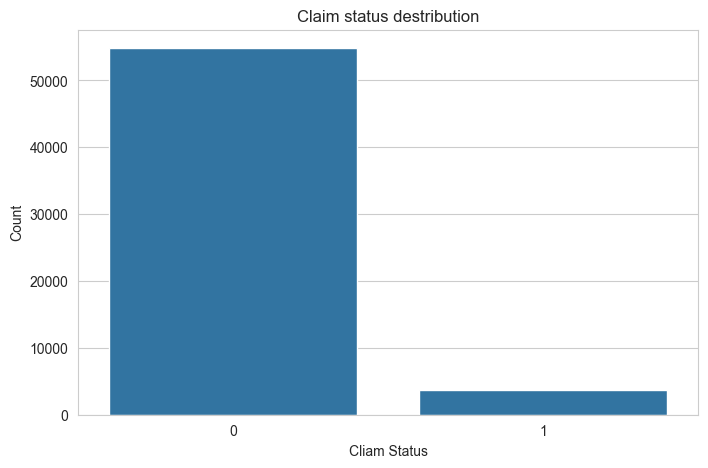

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x='claim_status',data=df)
plt.title("Claim status destribution")
plt.xlabel("Cliam Status")
plt.ylabel("Count")
plt.show()

Next, I will perform an analysis of both numerical and categorical features to understand their distributions and relationships with the claim_status. Let’s start by examining the distributions of some key numerical features such as subscription_length, vehicle_age, and customer_age:

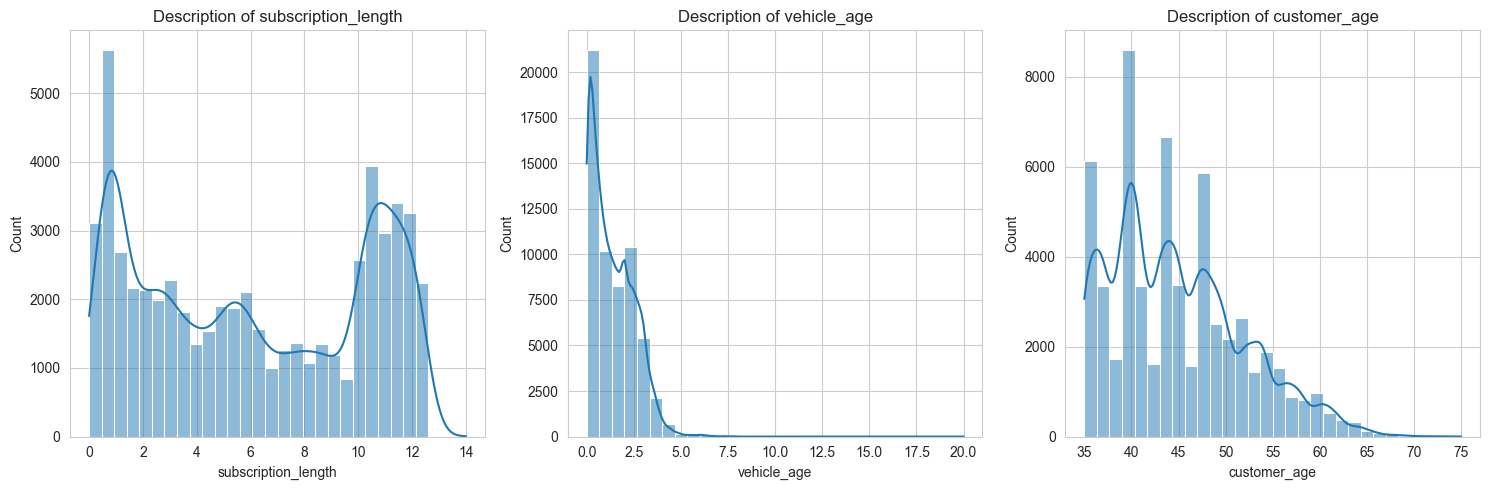

In [47]:
numerical_columns=['subscription_length','vehicle_age','customer_age']
plt.figure(figsize=(15,5))
for i, column in enumerate(numerical_columns,1):
    plt.subplot(1,3,i)
    sns.histplot(df[column],bins=30,kde=True)
    plt.title(f'Description of {column}')

plt.tight_layout()
plt.show()

#Next, we will analyze relevant categorical features to understand their variation and relationship with the claim_status. I’ll focus on features like region_code, segment, and fuel_type:

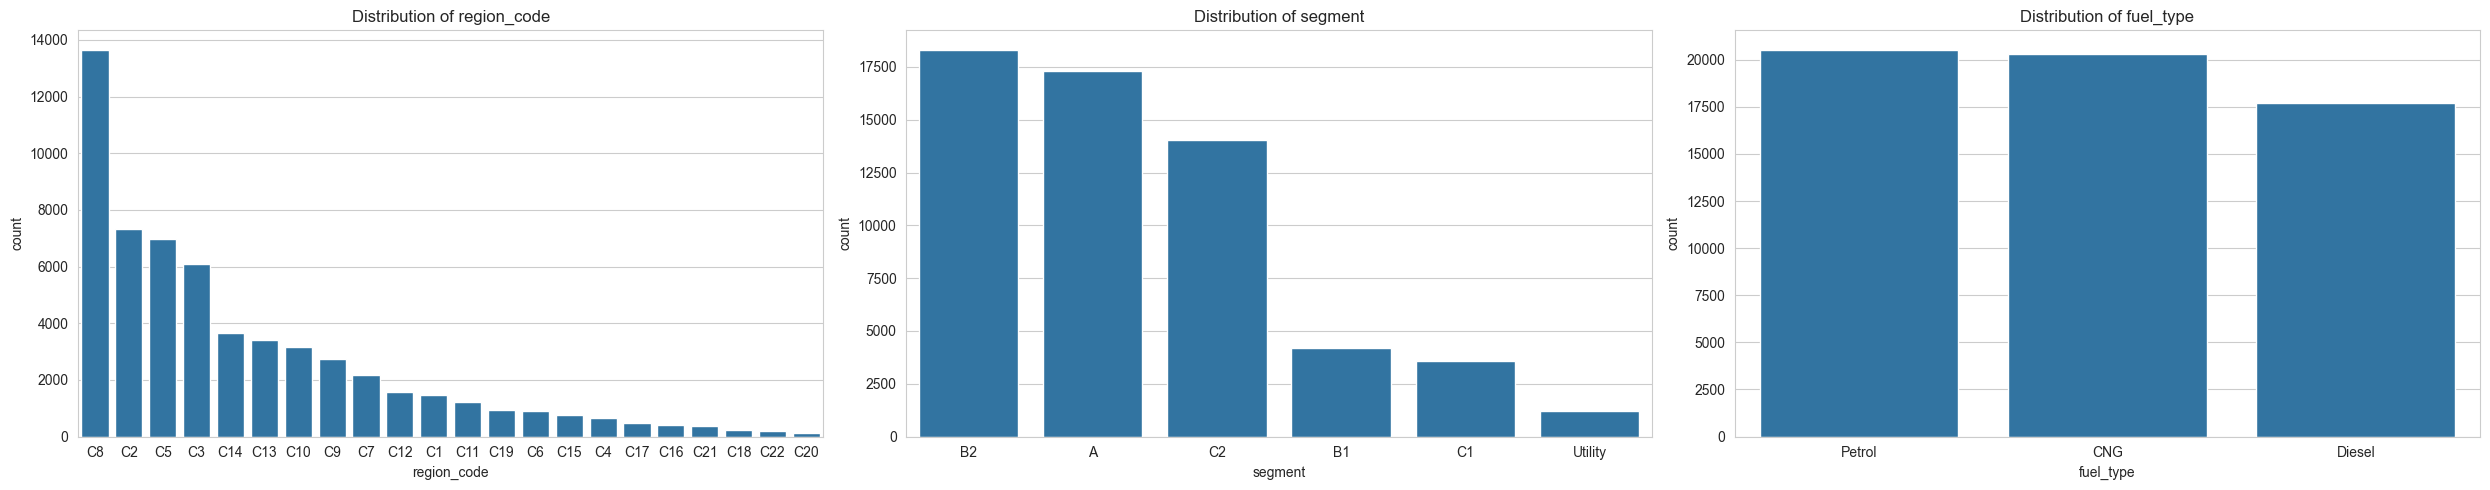

In [46]:
categorical_columns=['region_code','segment','fuel_type']
plt.figure(figsize=(25,5))
for i, column in enumerate(categorical_columns,1):
    plt.subplot(1,3,i)
    sns.countplot(data=df,x=column,order = data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

Handling Class Imbalance
The next step is to balance the dataset using oversampling to handle the class imbalance observed in the claim_status. Let’s proceed with balancing the classes:

In [48]:
from sklearn.utils import resample

In [55]:
majority = df[df.claim_status== 0]
minority = df[df.claim_status == 1]

In [56]:
majority

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [57]:
minority

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
12,POL050280,10.2,1.6,41,C2,27003,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
29,POL021346,10.9,2.0,41,C10,73430,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
76,POL044165,12.2,0.4,41,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,1
81,POL012008,11.1,1.0,57,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
84,POL043686,1.1,0.0,53,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58475,POL052302,0.4,1.4,36,C9,17804,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
58517,POL053069,0.9,1.8,37,C2,27003,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,1
58524,POL039299,2.2,0.6,37,C11,6108,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
58543,POL014364,11.7,1.2,51,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1


In [60]:
# oversample the minority class
minority_oversampled = resample(minority,replace = True, n_samples=len(majority),random_state=42)
minority_oversampled.shape

(54844, 41)

In [63]:
# combine majority class with oversampled minority class
oversampled_data=pd.concat([majority, minority_oversampled])
oversampled_data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,POL044783,11.6,0.2,54,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
36093,POL044451,11.3,1.0,61,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
54154,POL040484,7.7,0.0,49,C11,6108,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
48891,POL040274,11.2,1.0,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1


In [66]:
# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data['claim_status'].value_counts()
oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

After performing oversampling on the minority class, both classes are balanced with 54,844 entries each. Now, let’s have a look at some key variables to see what the balanced data looks like:

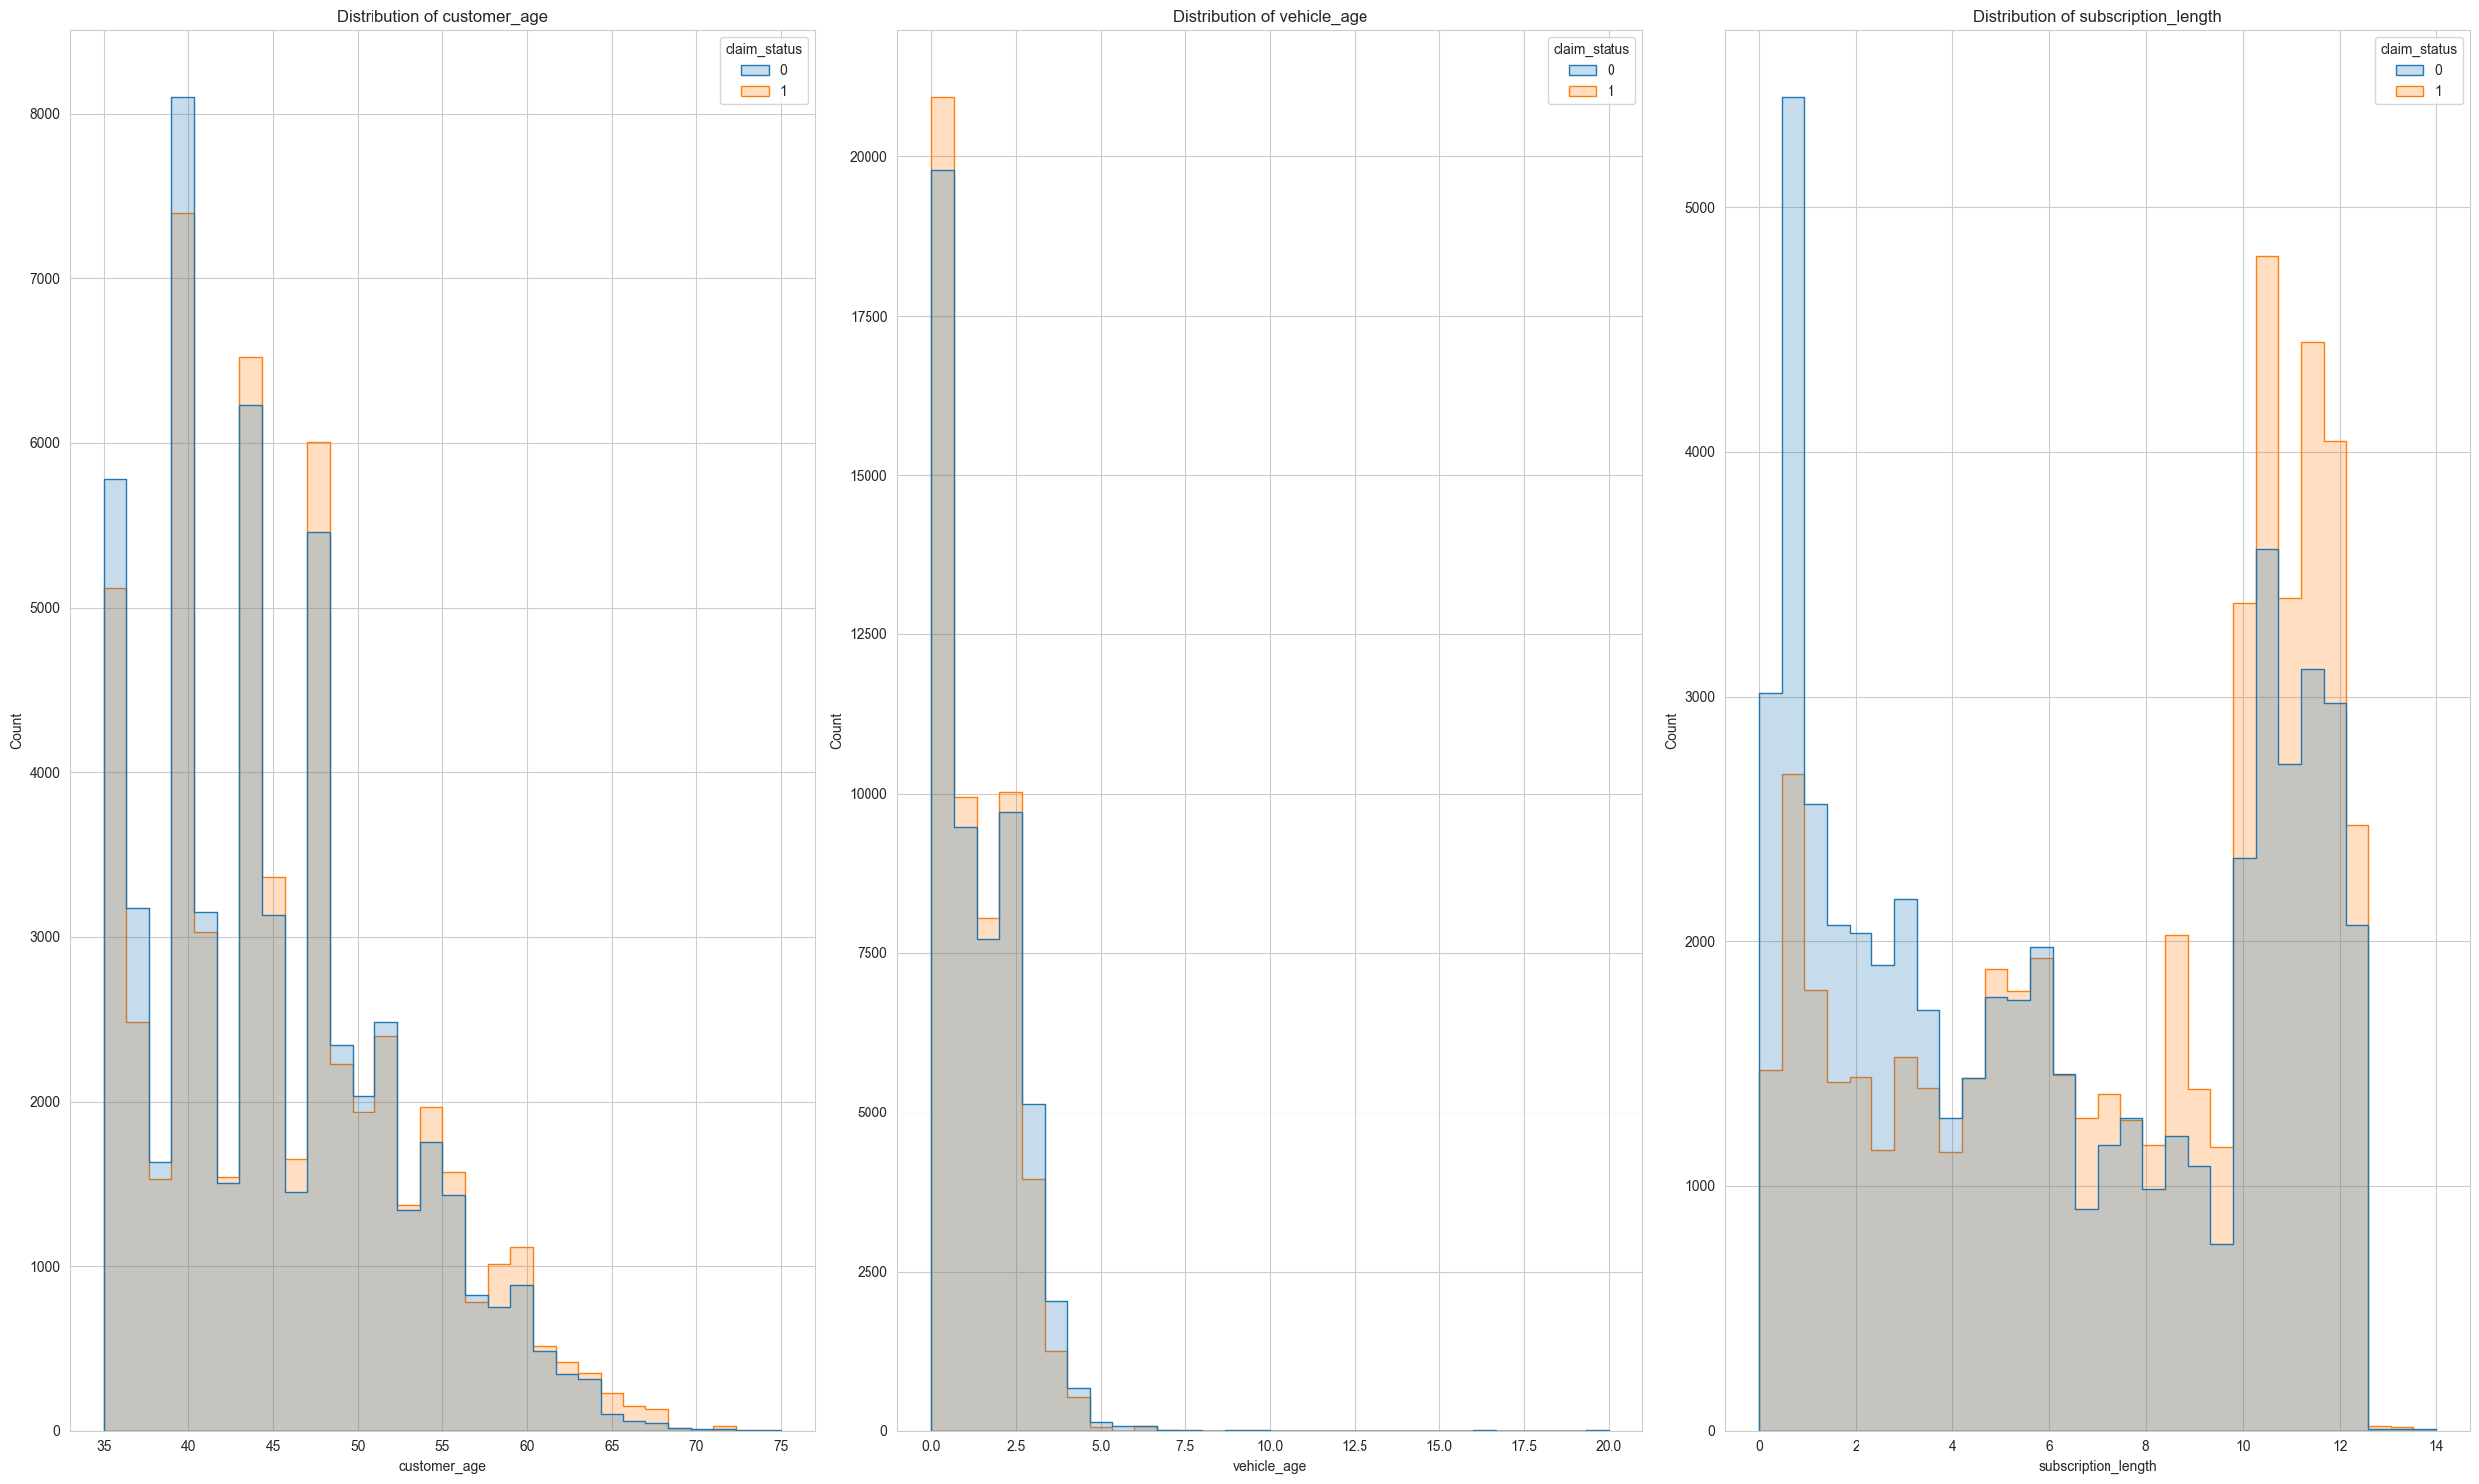

In [76]:
#plotting grapgh
plt.figure(figsize=(25,15))

# 'customer_age' distribution
plt.subplot(1,3,1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Distribution of customer_age')

# 'vehicle_age' distribution
plt.subplot(1,3,2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Distribution of vehicle_age')

# 'subscription_length' distribution
plt.subplot(1,3,3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Distribution of subscription_length')

plt.tight_layout()
plt.show()

Feature Selection
Now, we will identify the most important variables for predicting insurance frequency claims. It involves analyzing both categorical and numerical features to determine their impact on the target variable. We will use feature importance techniques suitable for both types of variables. Let’s start with feature selection to identify the most important variables:

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [89]:
# encode categorical variables
label_encoder=LabelEncoder()
oversampled_data=oversampled_data.apply(lambda col: label_encoder.fit_transform(col) if col.dtype=='object' else col)
encoded_data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,45359,9.3,1.2,41,20,8794,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
1,16744,8.2,1.8,35,11,27003,3,10,1,2,...,0,1,1,1,1,1,1,1,4,0
2,7193,9.5,0.2,44,20,8794,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
3,18145,5.2,0.4,44,1,73430,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
4,49010,10.1,1.0,56,4,5410,2,6,1,3,...,0,1,1,1,0,0,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,19268,10.6,2.6,48,17,34738,2,7,2,0,...,1,1,1,1,1,1,1,1,2,0
58588,1253,2.3,2.2,37,15,4076,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
58589,19858,6.6,2.2,35,20,8794,2,7,2,0,...,1,1,1,1,1,1,1,1,2,0
58590,14060,4.1,3.6,44,20,8794,2,7,2,0,...,1,1,1,1,1,1,1,1,2,0


In [79]:
df

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [92]:
# separate features and target variable
X = oversampled_data.drop('claim_status',axis=1)
X

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,45359,9.3,1.2,41,20,8794,4,5,1,4,...,1,1,1,1,1,1,0,1,1,3
1,16744,8.2,1.8,35,11,27003,3,10,1,2,...,1,0,1,1,1,1,1,1,1,4
2,7193,9.5,0.2,44,20,8794,4,5,1,4,...,1,1,1,1,1,1,0,1,1,3
3,18145,5.2,0.4,44,1,73430,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
4,49010,10.1,1.0,56,4,5410,2,6,1,3,...,0,0,1,1,1,0,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,44782,11.6,0.2,54,17,34738,1,9,0,6,...,0,0,1,1,1,0,0,1,1,2
36093,44450,11.3,1.0,61,17,34738,2,7,2,0,...,0,1,1,1,1,1,1,1,1,2
54154,40483,7.7,0.0,49,2,6108,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
48891,40273,11.2,1.0,44,20,8794,4,5,1,4,...,1,1,1,1,1,1,0,1,1,3


In [93]:
Y=oversampled_data['claim_status']
Y

0        0
1        0
2        0
3        0
4        0
        ..
45723    1
36093    1
54154    1
48891    1
44648    1
Name: claim_status, Length: 109688, dtype: int64

In [94]:
Y.shape

(109688,)

In [95]:
# create a random forest classifier model
rf_classifier=RandomForestClassifier(random_state=42)
rf_classifier.fit(X,Y)

RandomForestClassifier(random_state=42)

In [96]:
# get feature importance
feature_importance = rf_classifier.feature_importances_
feature_importance

array([2.64011844e-01, 2.55746232e-01, 1.62295503e-01, 1.66371334e-01,
       6.45972219e-02, 6.43083718e-02, 1.23411065e-03, 2.04345333e-03,
       5.05852791e-04, 1.05391290e-03, 9.50442895e-04, 1.39256027e-03,
       3.82490155e-04, 3.81477290e-04, 3.74279762e-04, 1.51787517e-04,
       7.79175654e-05, 5.43927214e-04, 1.73410554e-04, 1.26705309e-03,
       5.93720176e-04, 4.36320619e-04, 4.46898009e-04, 1.32256011e-03,
       2.16556652e-03, 1.26137791e-03, 1.35280318e-03, 2.90630664e-04,
       2.75451728e-04, 3.24667445e-04, 4.16974404e-04, 3.42504110e-04,
       3.43042109e-04, 3.37373397e-04, 1.04712581e-04, 3.20040263e-04,
       2.77806647e-04, 3.02068933e-04, 1.16107758e-04, 1.10619003e-03])

In [98]:
# create a dataframe for visualization of feature importance
feature_df=pd.DataFrame({'feature':X.columns,'Importance':feature_importance})
feature_df

,feature,Importance
0,policy_id,0.264012
1,subscription_length,0.255746
2,vehicle_age,0.162296
3,customer_age,0.166371
4,region_code,0.064597
5,region_density,0.064308
6,segment,0.001234
7,model,0.002043
8,fuel_type,0.000506
9,max_torque,0.001054


In [99]:
#sort according to range
feature_df.sort_values(by='Importance', ascending=False)

,feature,Importance
0,policy_id,0.264012
1,subscription_length,0.255746
3,customer_age,0.166371
2,vehicle_age,0.162296
4,region_code,0.064597
5,region_density,0.064308
24,length,0.002166
7,model,0.002043
11,engine_type,0.001393
26,gross_weight,0.001353


In [101]:
feature_df.head(10)

,feature,Importance
0,policy_id,0.264012
1,subscription_length,0.255746
2,vehicle_age,0.162296
3,customer_age,0.166371
4,region_code,0.064597
5,region_density,0.064308
6,segment,0.001234
7,model,0.002043
8,fuel_type,0.000506
9,max_torque,0.001054


In [102]:
# now perfor train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [103]:
X=oversampled_data.drop('policy_id',axis=1)

In [104]:
X

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
1,8.2,1.8,35,11,27003,3,10,1,2,8,...,0,1,1,1,1,1,1,1,4,0
2,9.5,0.2,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
3,5.2,0.4,44,1,73430,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
4,10.1,1.0,56,4,5410,2,6,1,3,7,...,0,1,1,1,0,0,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,11.6,0.2,54,17,34738,1,9,0,6,3,...,0,1,1,1,0,0,1,1,2,1
36093,11.3,1.0,61,17,34738,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,1
54154,7.7,0.0,49,2,6108,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,1
48891,11.2,1.0,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,1


In [105]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [107]:
#Fitiing the model
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [108]:
y_pred=rf_classifier.predict(X_test)

In [110]:
# predictions
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10872
           1       1.00      1.00      1.00     11066

    accuracy                           1.00     21938
   macro avg       1.00      1.00      1.00     21938
weighted avg       1.00      1.00      1.00     21938



Now, let’s label the original imbalanced data using our model to see how many instances are correctly classified from our model:

In [147]:
# prepare the oversampled data
original_encoded = data.drop(['policy_id'], axis=1).copy()
encoders = {col: LabelEncoder().fit(X[col]) for col in X.select_dtypes(include=['object']).columns}#this means X.columns if col.dtype=='object' else col
print(encoders) #{}
for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_classifier.predict(original_encoded)

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

{}


ValueError: could not convert string to float: 'C8'

In [116]:
original_encoded

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [118]:
encoders

{}

In [141]:
data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [143]:
#Let’s visualize the percentage of correctly classified and misclassified samples:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy')
plt.show()

KeyError: 'Predicted'